In [65]:
import pandas as pd 
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [50]:
data=load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Cheecking null value
df.isnull().isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
# Target value get from data 
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/mewaris/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

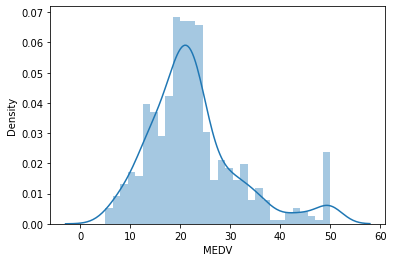

In [51]:
sns.distplot(df['MEDV'],bins=30)

<AxesSubplot:>

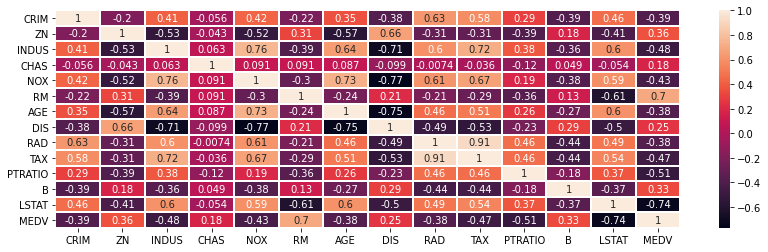

In [46]:
# Choosing right Variable before Fitting data - Feature Selection
plt.figure(figsize=(14,4))
sns.heatmap(data=df.corr(),linewidths=.1,annot=True)

In [60]:

df.columns

# AGE - DIS  Not Selection Due Corr
# RAD -Tax High correlation
# CRIM,ZN ,INDUS,CHAS,NOX,PITATIO,B - Low Importance

# Final Feature 
# lstat,rm

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

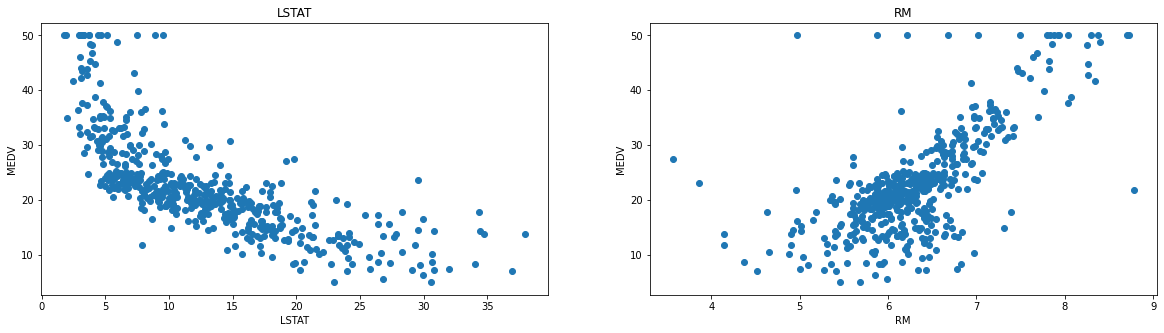

In [53]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
# One RM is when MEDV is Increasing 
# LSTAT Is Decreasing  Down trend

In [59]:
# Splitting Into X and Y
X = df[features]
y = df['MEDV']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

lm = LinearRegression()
lm.fit(X_train, Y_train)
y_train_predict = lm.predict(X_train)
r2 = r2_score(Y_train, y_train_predict)


y_test_predict = lm.predict(X_test)
r2_t = r2_score(Y_test, y_test_predict)

In [136]:
y_test_predict

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559,
        7.97136102, 30.7066387 , 27.83076842, 26.26693081, 21.97871678,
       32.33149332, 23.21791374, 22.9932889 , 30.97465356, 27.19747687,
       20.7171544 , -0.67524986, 18.01248654, 12.3108109 , 21.90615827,
        4.82262227, 24.00423026, 37.70279396, 24.59521859, 29.6355729 ,
       12.5396288 , 27.07081337, 22.44485896, 27.64895322, 28.99223597,
       11.38689571, 10.39119661, 18.02726641, 24.65916571, 26.3259374 ,
       22.97547671, 26.32610451, 12.30204538, 37.03909693, 33.55198947,
       20.2779501 ,  1.0905118 , 27.65786778, 16.52789139, 27.49181818,
       29.91634422, -3.04746229, 17.23365847, 20.71953914, 13.74285813,
       20.74965837, 21.48012369, 25.17310326, 16.12470269, 17.61200383,
       27.89189158, 36.0647476 , 19.67862758, 28.88714637, 20.4560256 ,
       20.11858445, 23.1131674 , 16.53445226, 31.30827991, 22.62162748,
       13.10525045, 23.36377939, 25.90474345, 23.00735629, 21.62

In [138]:
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")


print("The model performance for test set")
print("--------------------------------------")
print('R2 score is {}'.format(r2_t))
print("\n")





The model performance for training set
--------------------------------------
R2 score is 0.6300745149331701


The model performance for test set
--------------------------------------
R2 score is 0.6628996975186952




In [109]:
# save the model to disk
import pickle
pickle.dump(lm, open('linearmodel.sav', 'wb'))

Modellr=pickle.load(open('linearmodel.sav','rb'))

In [126]:
# LSTAT :Lower status of the population
# RM : average number of rooms per dwelling

,LSTAT,RM
355,5.57,5.936


In [124]:
two = X_train.tail(1)
Modellr.predict(two)

array([25.98388091])